In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
current_dir = os.getcwd()
results = pd.read_csv(current_dir + '/MISA/results/mosei_MISA_confidNet_mse_epoch(10)_test_results_process_all_zero_version.csv')

In [3]:
'''confidNet results
labels: ['happiness', 'sadness', 'anger', 'fear', 'disgust', 'surprise']
'''
results.head()

,id,input_text,emo_label,predict,confid_loss,target_tcp,pred_tcp,tcp_VA,tcp_TA,tcp_TV,tcp_T,tcp_V,tcp_A
0,-6rXp3zJ3kc[1],very aware of many people are not until they g...,[0. 1. 0. 0. 0. 0.],[0.55662537 0.38589606 0.3532847 0.32799417 0...,0.018769,0.385896,0.488404,0.402026,0.392041,0.341990,0.319324,0.370098,0.424293
1,-AUZQgSxyPQ[0],the perfect soul mate to the spot therapy brus...,[0. 0. 0. 0. 0. 1.],[0.7481889 0.23310995 0.18807708 0.17202565 0...,0.018769,0.256660,0.536308,0.380714,0.285624,0.193267,0.201646,0.292661,0.426436
2,-6rXp3zJ3kc[2],so the answer to the question can i contribute...,[0. 1. 0. 0. 0. 0.],[0.5145242 0.36878633 0.3164015 0.21287923 0...,0.018769,0.368786,0.509062,0.423949,0.365714,0.324649,0.288416,0.387662,0.433118
3,-MeTTeMJBNc[3],picture maybe you could find a picture of the ...,[1. 0. 0. 1. 0. 0.],[0.58545935 0.32975513 0.27381423 0.2885348 0...,0.018769,0.436997,0.516641,0.370222,0.465935,0.407245,0.422203,0.320435,0.370480
4,-ri04Z7vwnc[4],finances i think first it's important for indi...,[1. 1. 0. 0. 0. 0.],[0.4575943 0.44383404 0.2887272 0.21906146 0...,0.018769,0.450714,0.500949,0.447640,0.485406,0.377890,0.395362,0.369349,0.476758


In [4]:
print(len(results))

3953


In [5]:
results['emo_label'].loc[lambda x: x =='[0. 0. 0. 0. 0. 0.]'].count()

0

In [6]:
print(np.mean(results['confid_loss']))

0.017623297110116946


In [36]:
results['tcp_TVA'] = results['target_tcp']

In [37]:
text_is_noise = results[results['tcp_VA'] > results['tcp_TVA']]
audio_is_noise = results[results['tcp_TA'] > results['tcp_TVA']]
video_is_noise = results[results['tcp_TV'] > results['tcp_TVA']]

In [38]:
# Modality noise counts with no label rows dropped
print("Total counts: ", results.shape[0])
print("Textual noise counts: ", text_is_noise.shape[0])
print("Visual noise counts: ", video_is_noise.shape[0])
print("Audio noise counts: ", audio_is_noise.shape[0])

Total counts:  3953
Textual noise counts:  823
Visual noise counts:  1199
Audio noise counts:  3491


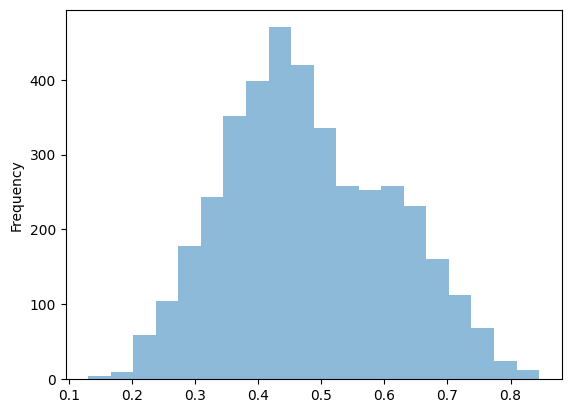

In [39]:
ax = results['tcp_TVA'].plot.hist(bins=20, alpha=0.5)

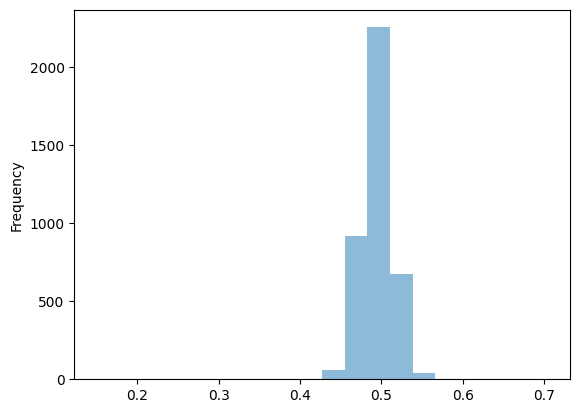

In [40]:
ax = results['pred_tcp'].plot.hist(bins=20, alpha=0.5)

In [41]:
df = pd.DataFrame({
    'tcp_TVA': results['tcp_TVA'],
    'tcp_TA': results['tcp_TA'],
    'tcp_TV': results['tcp_TV'],
    'tcp_VA': results['tcp_VA'],
    'tcp_T': results['tcp_T'],
    'tcp_V': results['tcp_V'],
    'tcp_A': results['tcp_A']
})

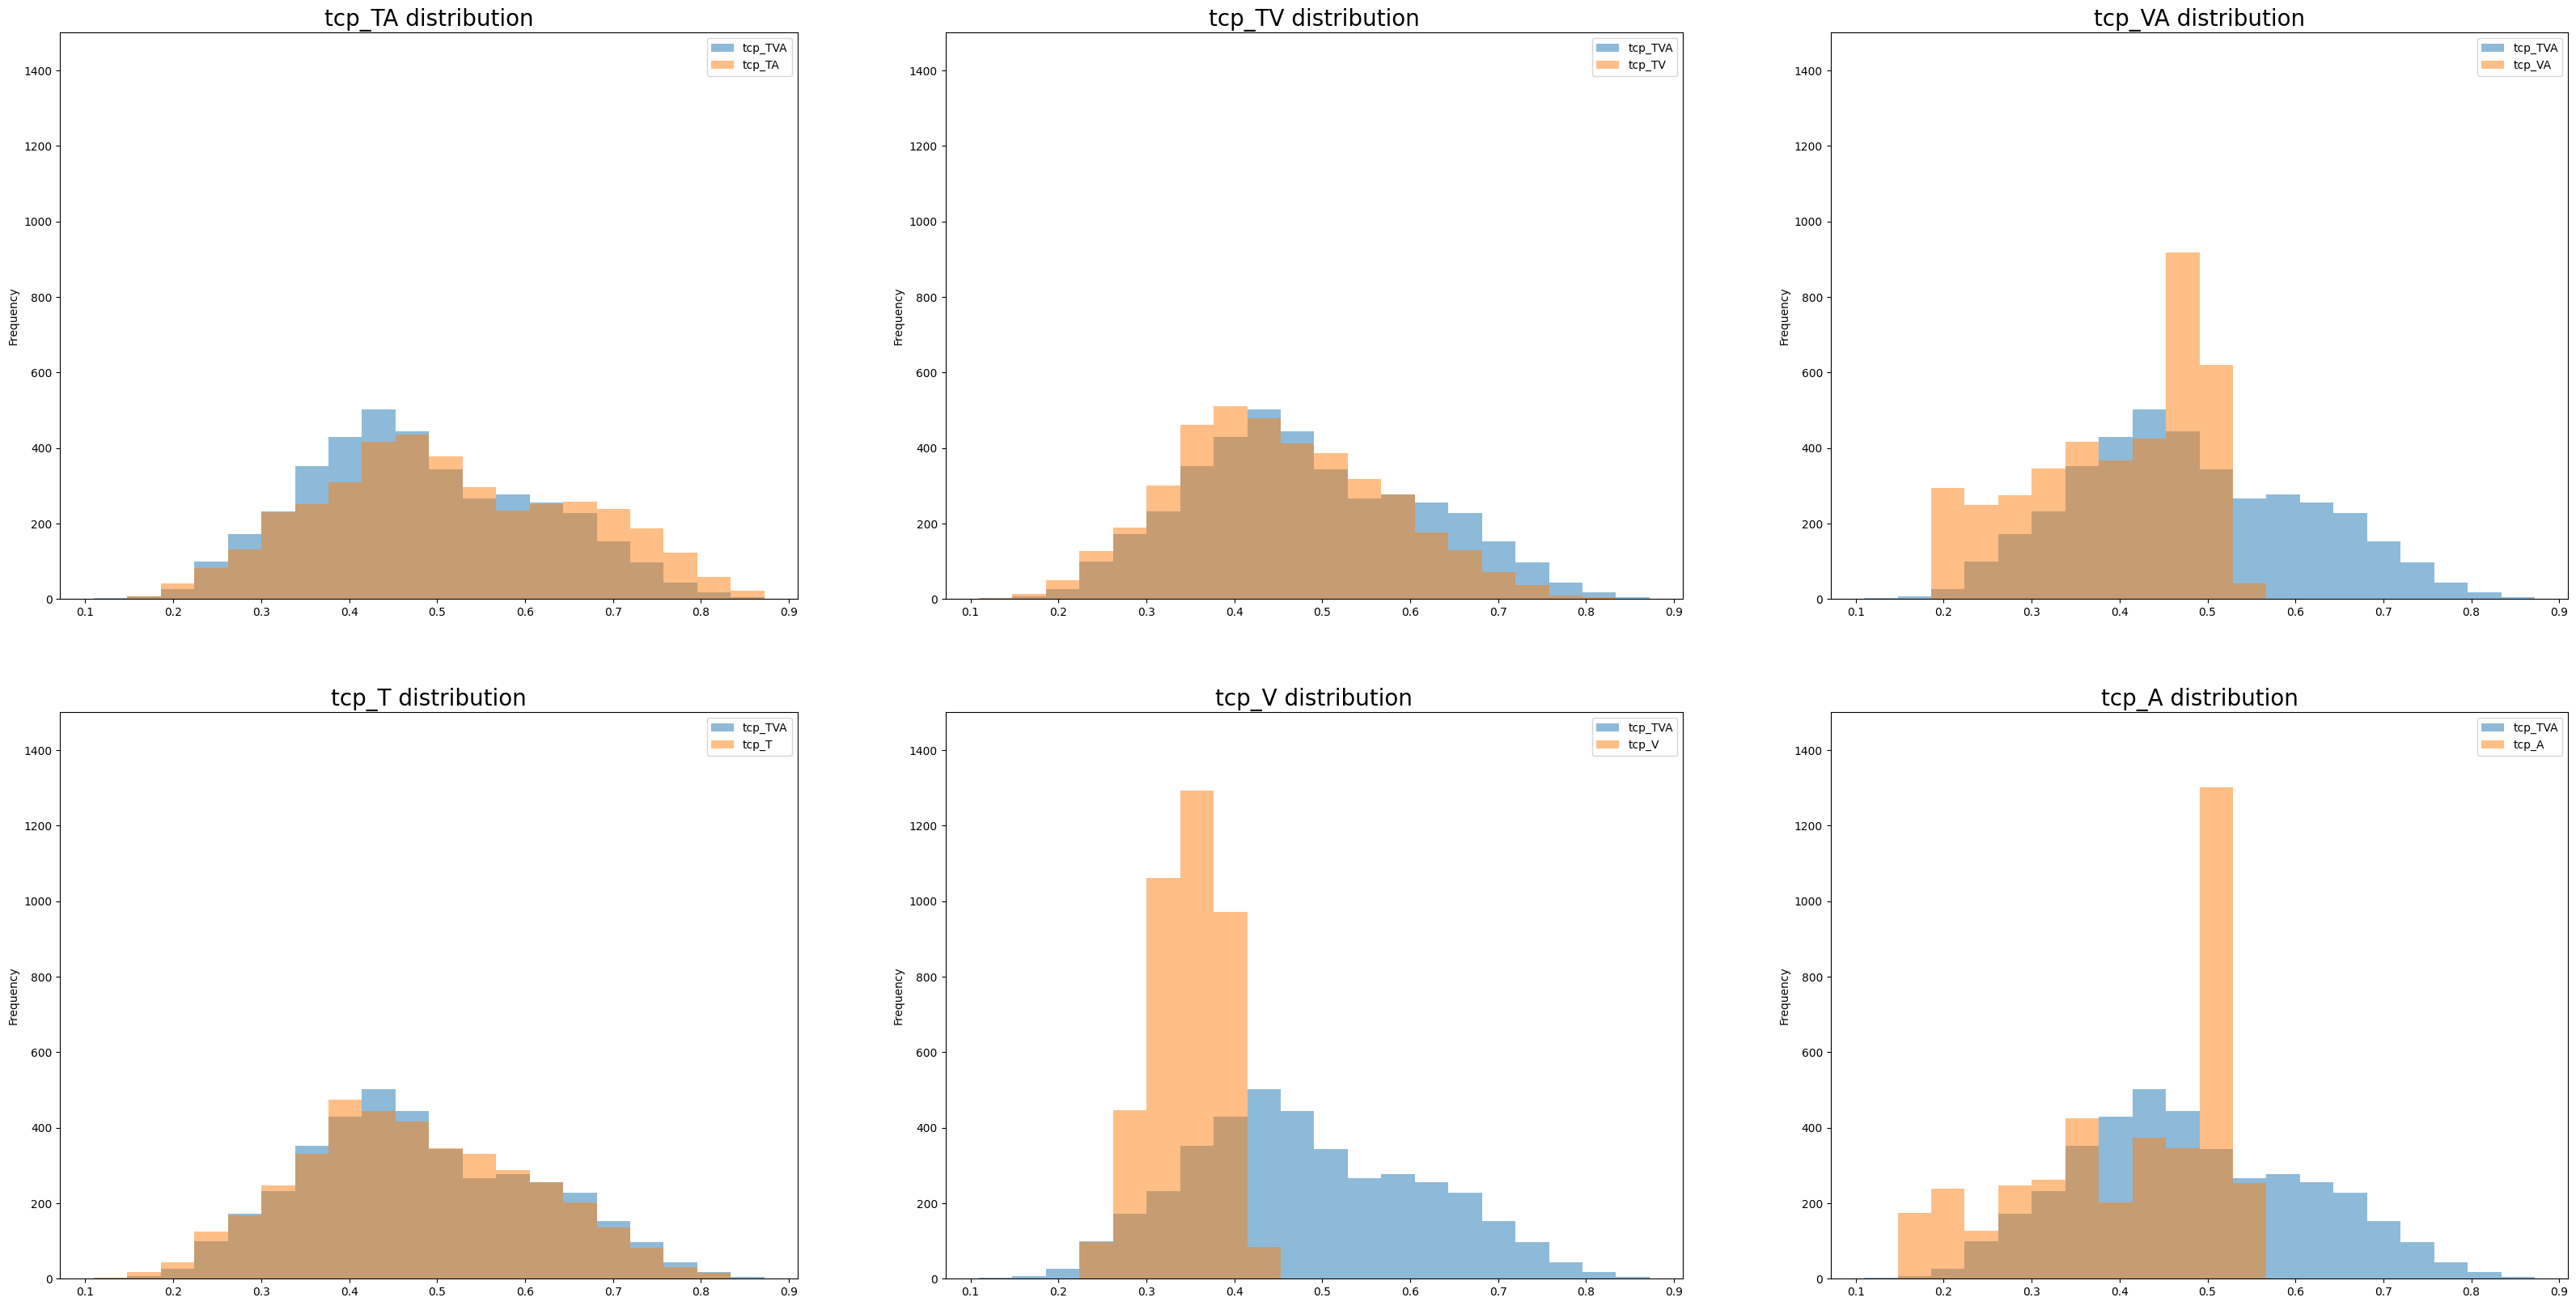

In [44]:
fig, ax = plt.subplots(2, 3, figsize=(40, 20))
m=0
for i in range(2):
    for j in range(3):
        df.plot.hist(column='tcp_TVA', bins=20, ax=ax[i,j], alpha=0.5, ylim=(0, 1500))
        df.plot.hist(column=df.columns[m+1], bins=20, ax=ax[i,j], alpha=0.5, ylim=(0, 1500))
        ax[i,j].set_title('{} distribution'.format(df.columns[m+1]), fontsize=20)
        m+=1
        if m == 7:
            break

Text(0.5, 0, 'Modality')

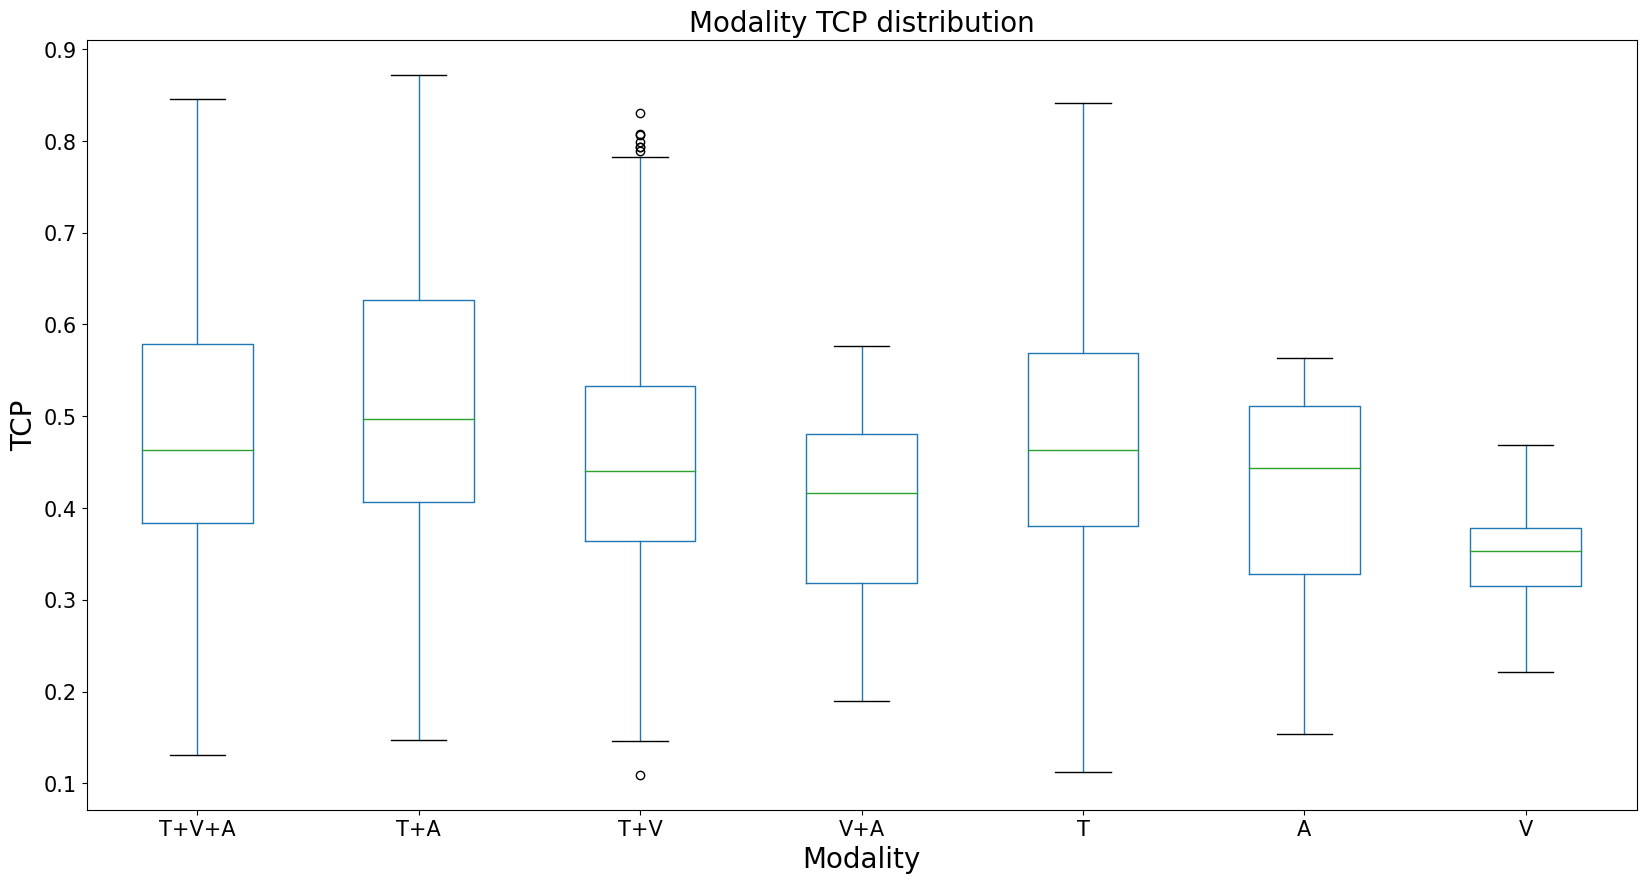

In [51]:
df = pd.DataFrame({'T+V+A': results['tcp_TVA'], 'T+A': results['tcp_TA'], 'T+V': results['tcp_TV'], 'V+A': results['tcp_VA'], 'T': results['tcp_T'], 'V': results['tcp_V'], 'A': results['tcp_A']})  
box_plot = df.boxplot(column=['T+V+A', 'T+A', 'T+V', 'V+A', 'T', 'A', 'V'], figsize=(20, 10), grid=False, fontsize=15)
box_plot.set_title('Modality TCP distribution', fontsize=20)
box_plot.set_ylabel('TCP', fontsize=20)
box_plot.set_xlabel('Modality', fontsize=20)

Text(0, 0.5, 'Mean TCP')

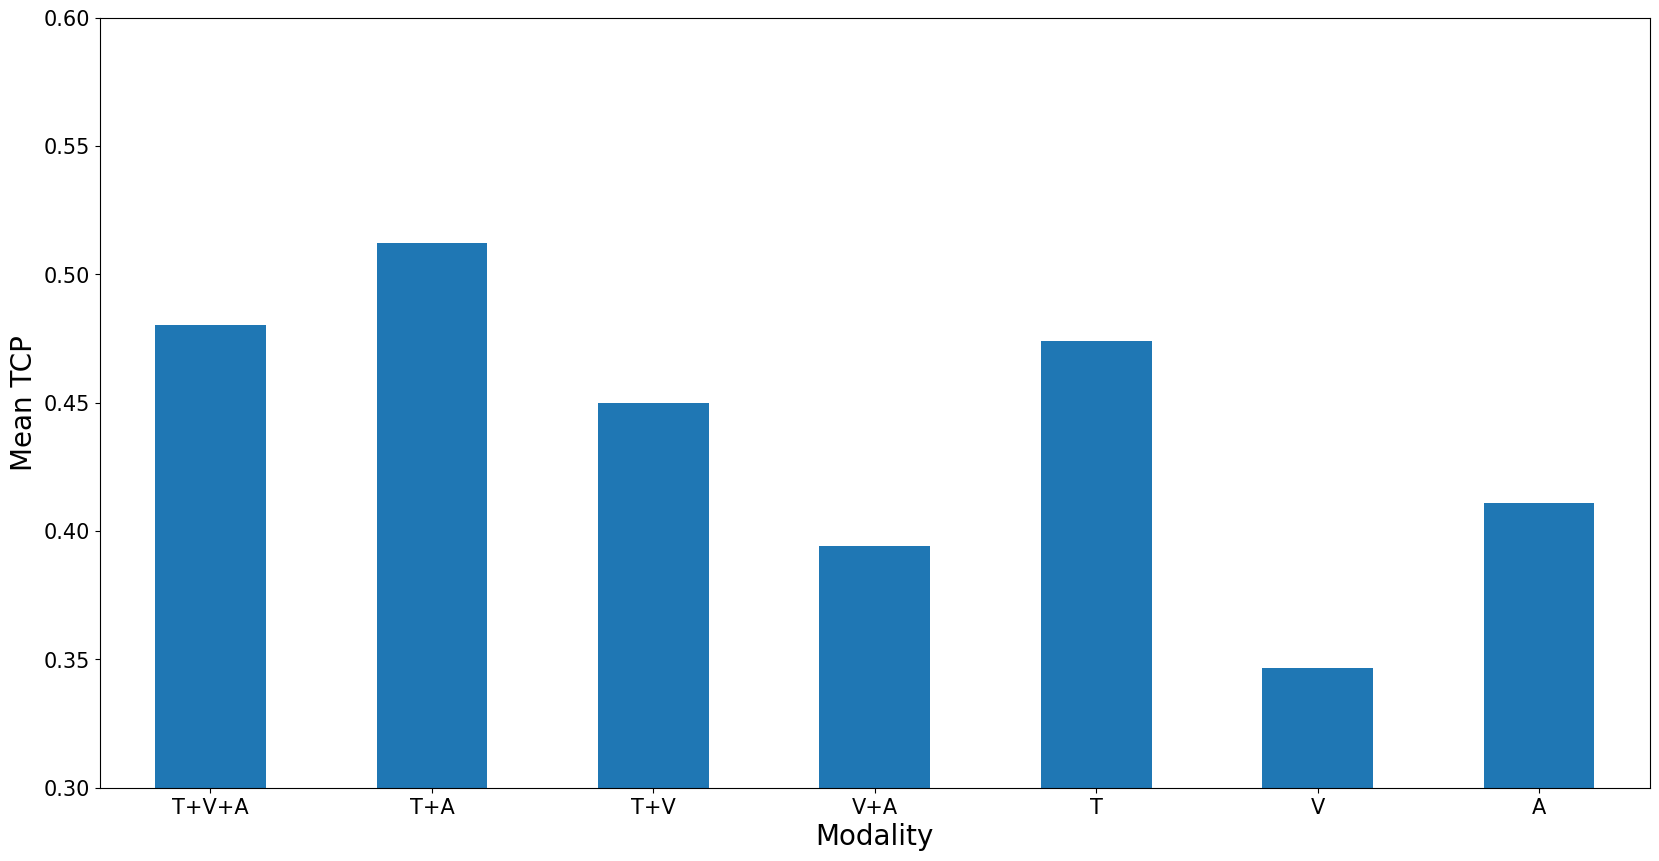

In [46]:
df = pd.Series({
    'T+V+A': np.mean(results['tcp_TVA']), 
    'T+A': np.mean(results['tcp_TA']), 
    'T+V': np.mean(results['tcp_TV']), 
    'V+A': np.mean(results['tcp_VA']), 
    'T': np.mean(results['tcp_T']),
    'V': np.mean(results['tcp_V']), 
    'A': np.mean(results['tcp_A'])
    })  
# histogram of the data
ax = df.plot.bar(figsize=(20, 10), fontsize=15, rot=0, ylim=(0.3, 0.6))
ax.set_xlabel("Modality", fontsize=20)
ax.set_ylabel("Mean TCP", fontsize=20)

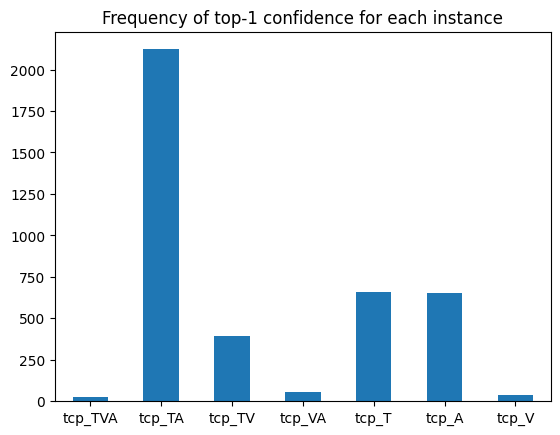

In [49]:
# Frequency of top-1 confidence for each modalities
columns = ['tcp_TVA', 'tcp_TA', 'tcp_TV', 'tcp_VA', 'tcp_T', 'tcp_A', 'tcp_V']
results['top_1_column'] = results[['tcp_TVA','tcp_TV','tcp_TA', 'tcp_VA', 'tcp_T', 'tcp_A', 'tcp_V']].idxmax(axis=1)
df = results['top_1_column'].value_counts(sort=False)
for i in columns:
    if i not in df.index:
        df[i] = 0
ax = df.loc[columns].plot.bar(rot=0, x=columns, title="Frequency of top-1 confidence for each instance")

<Axes: title={'center': 'Frequency of top-1 confidence for each instance'}>

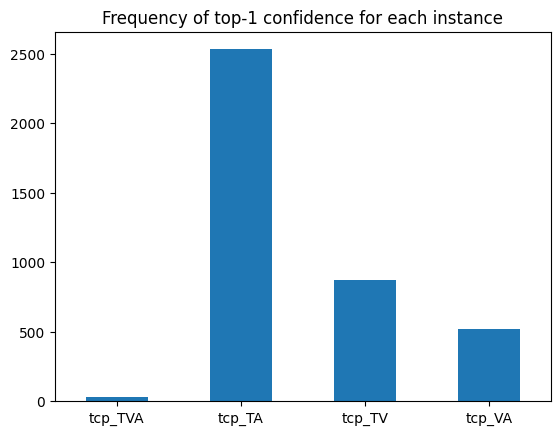

In [50]:
columns = ['tcp_TVA', 'tcp_TA', 'tcp_TV', 'tcp_VA']
results['top_1_column'] = results[['tcp_TVA','tcp_TV','tcp_TA', 'tcp_VA']].idxmax(axis=1)
df = results['top_1_column'].value_counts(sort=False)
for col in columns:
    if col not in df.index:
        df[col] = 0
df.loc[columns].plot.bar(rot=0, x=columns, title="Frequency of top-1 confidence for each instance")

In [65]:
df_diff = pd.DataFrame()
df_diff['T+V+A'] = results['tcp_TVA'] - results['tcp_TVA']
df_diff['T+V'] = results['tcp_TV'] - results['tcp_TVA']
df_diff['T+A'] = results['tcp_TA'] - results['tcp_TVA']
df_diff['V+A'] = results['tcp_VA'] - results['tcp_TVA']
df_diff['T'] = results['tcp_T'] - results['tcp_TVA']
df_diff['V'] = results['tcp_V'] - results['tcp_TVA']
df_diff['A'] = results['tcp_A'] - results['tcp_TVA']


Text(0, 0.5, 'TCP difference')

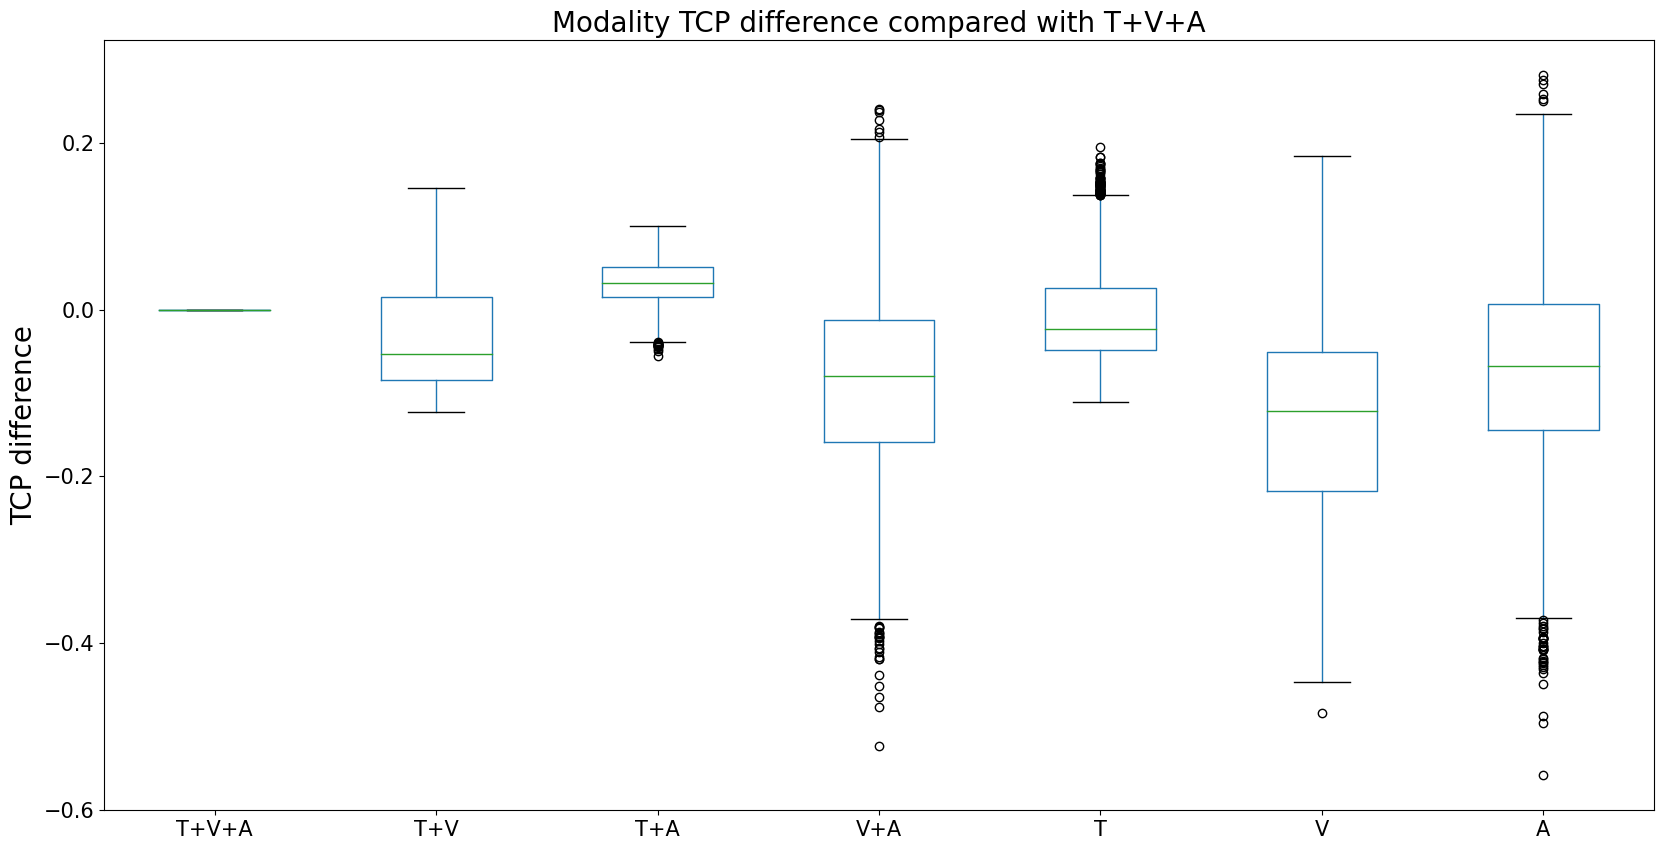

In [69]:
box = df_diff.boxplot(column=['T+V+A', 'T+V', 'T+A', 'V+A', 'T', 'V', 'A'], figsize=(20, 10), grid=False, fontsize=15)
box.set_title('Modality TCP difference compared with T+V+A', fontsize=20)
box.set_ylabel('TCP difference', fontsize=20)